<a href="https://colab.research.google.com/github/Abdelmounim1996/Hierarchical-Clustering-of-a-Mixture-Model/blob/master/Resultats_HCMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Abdelmounim1996/Hierarchical-Clustering-of-a-Mixture-Model

Cloning into 'Hierarchical-Clustering-of-a-Mixture-Model'...
remote: Enumerating objects: 1194, done.
remote: Counting objects: 100% (1194/1194), done.
remote: Compressing objects: 100% (1171/1171), done.
remote: Total 1194 (delta 96), reused 1069 (delta 20), pack-reused 0
Receiving objects: 100% (1194/1194), 31.22 MiB | 23.28 MiB/s, done.
Resolving deltas: 100% (96/96), done.


# Loading github repository and connect google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls '/content/Hierarchical-Clustering-of-a-Mixture-Model/AHC-GMM/mylib/Clustering.py'

/content/Hierarchical-Clustering-of-a-Mixture-Model/AHC-GMM/mylib/Clustering.py


In [ ]:
!cat '/content/Hierarchical-Clustering-of-a-Mixture-Model/AHC-GMM/mylib/Clustering.py'

# library mathematic & statistic 
import numpy as np
from scipy.stats import multivariate_normal
from scipy import linalg
from numpy.linalg import multi_dot
from sklearn.mixture.base import BaseMixture, _check_shape
from sklearn.utils import check_array, check_random_state
import warnings
# library for machine learning
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
np.seterr(divide='ignore', invalid='ignore')

def Kullback_Leibler_Distance(GMM1 , GMM2 ):
  Means_1 , Covars_1 = GMM1
  Means_2 , Covars_2 = GMM2
  Covars_1 =  numpy_cholesky(Covars_1)
  Covars_2 =  numpy_cholesky(Covars_2)
  Det = np.log(np.abs( det_cholesky(Covars_2)/det_cholesky(Covars_1)[:, np.newaxis]))
  inv_S = inv_cholesky(Covars_2 )
  n_clusters_2 , n_features = Means_2.shape ;  n_clusters_1 = Means_1.shape[0] ; dis = np.empty((n_clusters_1, n_clusters_2))
  for k in range(n_clusters_2):
    dif_mu  = Means_1-Means_2[k]
    dis[:,k] = 0.5*( Det[:, k]+ np.trace(np.dot( Covars_1 , inv_

In [ ]:
import sys
sys.path.append('/content/Hierarchical-Clustering-of-a-Mixture-Model/AHC-GMM')

In [ ]:
from mylib.Clustering import Hierarchical_Mixture_Model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.mixture.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.mixture. Anything that cannot be imported from sklearn.mixture is now part of the private API.
  warnings.warn(message, FutureWarning)


# Testing for make_blobs data 

In [ ]:
""" data visualization  and graphical plotting library """
import matplotlib
import matplotlib . pyplot as plt
plt.style.use('dark_background')
"""   My libraray """

"""   Generate data library"""
from sklearn.datasets import make_blobs
n_samples_ = 1000
k = 10
X, y_true = make_blobs(n_samples=n_samples_,
                       n_features = 2 , centers=k,
                       cluster_std=0.5,
                       random_state=0)

In [ ]:
%%time
model = Hierarchical_Mixture_Model(10, 4).fit(X)
labels = model.predict(X)

CPU times: user 66.4 ms, sys: 69.6 ms, total: 136 ms
Wall time: 92.6 ms


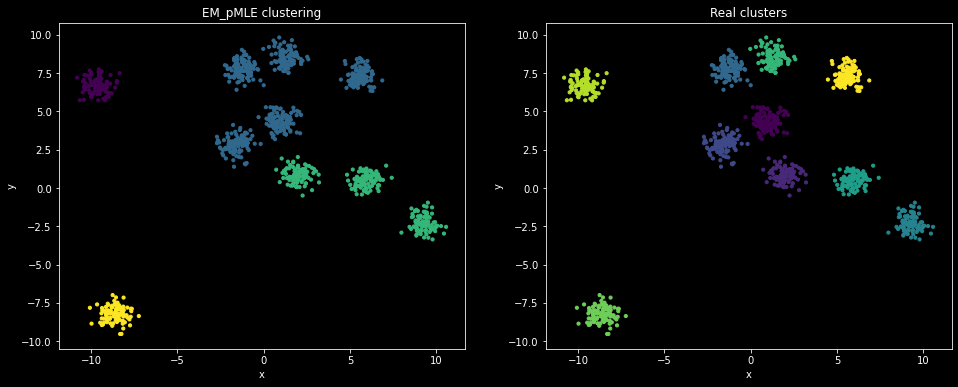

In [ ]:
"""Plotting data """
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(X[:,0], X[:,1], s = 10  ,c = labels , cmap='viridis')
ax2.scatter(X[:,0], X[:,1], s = 10 , c = y_true, cmap='viridis')
ax1.set_title('EM_pMLE clustering')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax2.set_title('Real clusters')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
plt.show()

# Testing for data under GMM





---

In [ ]:
!ls '/content/Hierarchical-Clustering-of-a-Mixture-Model/AHC-GMM/mylib/Sampling.py'

/content/Hierarchical-Clustering-of-a-Mixture-Model/AHC-GMM/mylib/Sampling.py


In [ ]:
!cat '/content/Hierarchical-Clustering-of-a-Mixture-Model/AHC-GMM/mylib/Sampling.py'

# mathematical libraries
import numpy as np
import random
from scipy import linalg
import itertools as it
# machine learning library 
from sklearn import mixture
from sklearn.decomposition import PCA
# plotting library
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches
import matplotlib.cm as cmx
from distinctipy import distinctipy
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.layouts import column
from bokeh.models import PrintfTickFormatter
from ipywidgets import interact, IntSlider, Dropdown
from ipywidgets import FloatSlider
from bokeh.core.properties import Instance, String
from bokeh.io import show
from bokeh.models import ColumnDataSource, LayoutDOM
from bokeh.util.compiler import TypeScript
# Errors and Exceptions library 
import warnings


# util functions for plotting 
def gmm_ellipse_2d( Means, Cov

In [ ]:
pip install distinctipy

In [ ]:
if None in [1 , None , 3 ]:
  print("hhh")
else :
  print("nooo")

hhh


In [ ]:

# data visualization and graphical plotting library
import matplotlib
import matplotlib . pyplot as plt
# library mathematic & statistic 
import numpy as np
from datetime import datetime
# my library to generate data under GMM models
from mylib.Sampling import sampling_gaussian_mixture_model
# library for machine learning
from sklearn.model_selection import train_test_split

In [ ]:
n_components      = 150                 # number of components to generate 
dim               = 2                 # dimension of dataset 
k                 = n_components      # composents of F function 
m                 = 10              # composents of G function
n_samples         = 4000              # numbers of samples of data 
option            = 'random_weights'  # option probability of weights 
global_components =   10             # global components of data to generate 

sgmm = sampling_gaussian_mixture_model(n_components ,dim )

SGCMM = sgmm.fit(n_samples , edge =global_components , upper= 30 , epsilon_noise= 1 , Adjusting_weights = 'equal_weights',  n_points = 30)
X      = SGCMM.X
y = SGCMM.labels


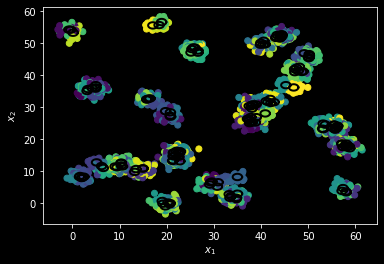

In [ ]:
sgmm.plot_gmm(draw_ellipse=True)


In [ ]:
from bokeh.io import output_notebook
output_notebook()

# run this code in jupyter notebook to show the animation 
method = 'random_weights'
edge = 2 
upper = 100
n_points =100 
epsilon_noise = 10.
sgmm.control_gmm_clusters_2d(method ,edge , upper , n_points , epsilon_noise)

interactive(children=(Dropdown(description='Method:', index=1, options=('random_weights', 'eqaul_weights'), va…

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.20, random_state=42)

In [ ]:

start_time = datetime.now()
m = 2

HCMM = Hierarchical_Mixture_Model(k,m)
hcmm = HCMM.fit(X_train)

labels_test= HCMM.predict(X_test)

labels_train= HCMM.predict(X_train)


end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:02.923008


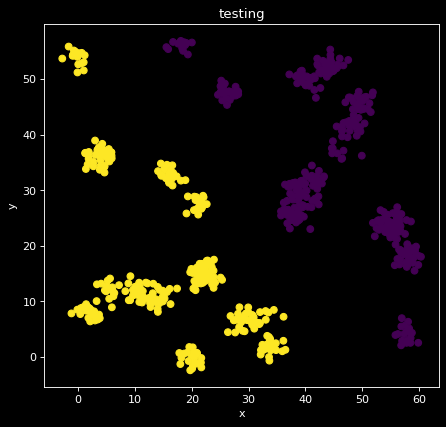

In [ ]:
fig = plt.figure(figsize=(14, 6), dpi=80)
ax2 = fig.add_subplot(122)
ax2.scatter(X_test[:,0],X_test[:,1] , c   = labels_test  )
ax2.set_title('testing')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
plt.show()

In [ ]:
n_components      = 4                # number of components to generate 
dim               = 3                # dimension of dataset 
k                 = n_components      # composents of F function 
m                 = 2              # composents of G function
n_samples         = 4000              # numbers of samples of data 
option            = 'random_weights'  # option probability of weights 
global_components =   10             # global components of data to generate 

sgmm = sampling_gaussian_mixture_model(n_components ,dim )

SGCMM = sgmm.fit(n_samples , edge =global_components , upper= 30 , epsilon_noise= 1 , Adjusting_weights = 'equal_weights',  n_points = 30)
X      = SGCMM.X
y = SGCMM.labels


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

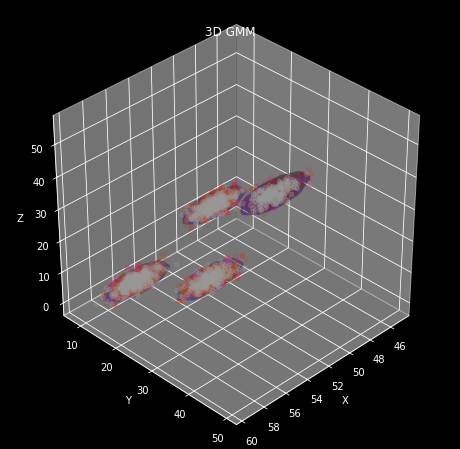

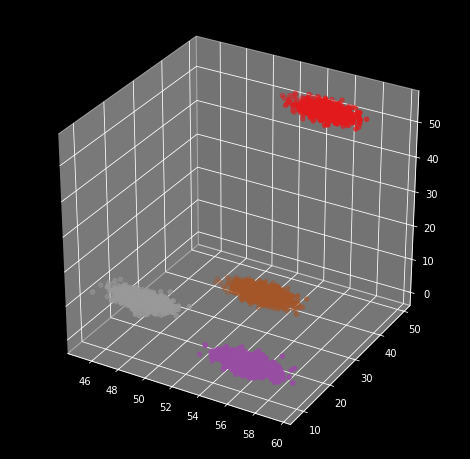

In [ ]:
sgmm.plot_gmm(draw_ellipse=True)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.20, random_state=42)

In [ ]:

start_time = datetime.now()
m = 2

HCMM = Hierarchical_Mixture_Model(k,m)
hcmm = HCMM.fit(X_train)

labels_test= HCMM.predict(X_test)

labels_train= HCMM.predict(X_train)


end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:00.062180


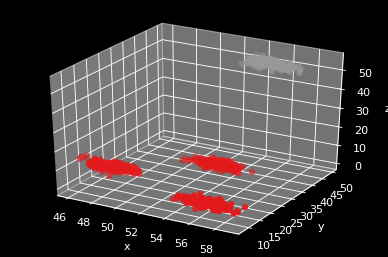

In [ ]:
fig = plt.figure(dpi=80)
axes = plt.axes(projection='3d')
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_zlabel("z")
axes.scatter(X_test[:,0],X_test[:,1] ,X_test[:,2], c   = labels_test  )
ax2.set_title('testing')
plt.show()